# Кейс - Приложение знакомств

### Описание кейса

Вы работаете аналитиком в приложении для онлайн-знакомств. Механика приложения следующая: пользователи видят в приложении анкеты друг друга и могут ставить друг другу лайки или дизлайки. Если пользователи поставили друг другу лайк – это называется мэтч, и у пользователей появляется возможность познакомиться.
Команда приложения разработала новый алгоритм для поиска наиболее подходящих анкет. Для проверки работы алгоритма был проведен АБ-тест. Все пользователи были разделены на две группы. Пользователи в группе с номером 0 пользовались приложением со старым алгоритмом. Все пользователи в группе 1 пользовались приложением с новым алгоритмом для поиска анкет.

Ваша задача – оценить, правда ли, что новый алгоритм улучшил качество сервиса. Для этого нужно выбрать метрики, которые отвечают за качество сервиса, и статистически сравнить эти метрики в двух группах.

В данных находится выгрузка логов взаимодействия пользователей друг с другом. Для каждой пары пользователей указано, из какой они группы АБ-теста и случился ли у них мэтч.

Результат вашей работы – аналитическое заключение с ответом на вопрос, стоит ли включать новую систему поиска анкет на всех пользователей.


## Шаг 1: Загрузка и осмотр данных 

In [9]:
import pandas as pd
import scipy.stats as ss
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-mahatyrov/lessons/statistics/dating_data.csv')

Сделаем предобработку данных

In [3]:
def review(data):
    display(data.head(5))
    print()
    print(data.info())
    print()
    print('Типы данных:')
    print(data.dtypes)
    print()
    print('Пропуски:', data.isna().sum())
    print()
    print('Явные дубликаты:')
    if data.duplicated().sum() > 0:
        print(data.duplicated().sum())
    else:
        print('Не найдено')

In [4]:
review(df)

,user_id_1,user_id_2,group,is_match
0,79,91,1,1
1,716,353,1,1
2,423,677,0,0
3,658,165,1,1
4,969,155,0,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14514 entries, 0 to 14513
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id_1  14514 non-null  int64
 1   user_id_2  14514 non-null  int64
 2   group      14514 non-null  int64
 3   is_match   14514 non-null  int64
dtypes: int64(4)
memory usage: 453.7 KB
None

Типы данных:
user_id_1    int64
user_id_2    int64
group        int64
is_match     int64
dtype: object

Пропуски: user_id_1    0
user_id_2    0
group        0
is_match     0
dtype: int64

Явные дубликаты:
Не найдено


## Шаг 2: Выбор метрик

Основная метрика, которую мы будем использовать для оценки качества сервиса, - это процент мэтчей (конверсий) в каждой группе. Если новый алгоритм улучшает качество сервиса, мы ожидаем, что процент мэтчей в группе 1 будет значительно выше, чем в группе 0.

## Шаг 3: Расчет метрик
Рассчитаем процент мэтчей для каждой группы.

In [5]:
# Расчет метрик
conversion_rates = df.groupby('group')['is_match'].mean()
conversion_rates


group
0    0.194908
1    0.402078
Name: is_match, dtype: float64

## Шаг 4: Статистическое сравнение метрик
Для статистического сравнения метрик мы используем тест хи-квадрат. Создадим таблицу сопряженности и проведем тест.

In [6]:
contingency_table = pd.crosstab(df['group'], df['is_match'])

# Проведение хи-квадрат теста
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p

(618.6889141576198, 1.4418299163662586e-136)

## Интерпретация результатов

1. Значение хи-квадрат $ chi^2 = 618.69 $: Это значение показывает, насколько сильно наблюдаемые частоты отличаются от ожидаемых частот, если бы не было различий между группами. Чем больше значение хи-квадрат, тем больше различие.

2.  p-value $ = 1.44 \times 10^{-136} $: Это значение показывает вероятность того, что такое большое (или большее) различие между группами могло бы произойти случайно. В данном случае p-value крайне мало, что указывает на очень низкую вероятность случайного возникновения таких различий.

## Заключение

Поскольку p-value значительно меньше обычного уровня значимости (например, 0.05), мы отвергаем нулевую гипотезу. Это означает, что существует статистически значимое различие в конверсии между группами.

**Вывод**: Новый алгоритм поиска анкет значительно улучшил качество сервиса, увеличив процент мэтчей. Поэтому стоит рассмотреть возможность внедрения новой системы поиска анкет для всех пользователей приложения.


## Условия применения хи-квадрат

In [7]:
# Вывод ожидаемых частот
expected_values = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
expected_values


is_match,0,1
group,,
0,3193.015847,1598.984153
1,6477.984153,3244.015847


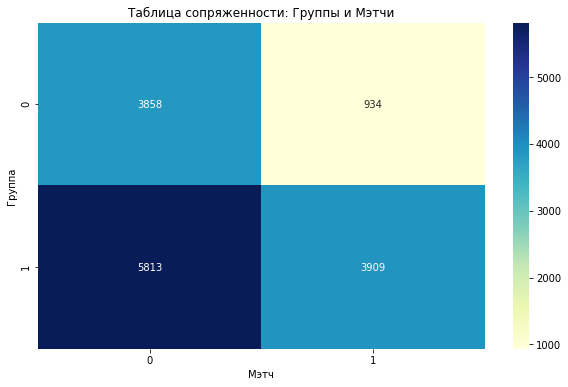

In [8]:


# Создание тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Таблица сопряженности: Группы и Мэтчи')
plt.xlabel('Мэтч')
plt.ylabel('Группа')
plt.show()


Условия применения хи-квадрат:

- Категориальные данные: Данные представлены в виде категорий (группы и результаты мэтчей).
- Ожидаемые частоты: Все ожидаемые частоты не меньше 5.

Все условия выполнены